In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

## 1. Densidad Efectiva de Estados

$N_c = 2 · \left( \frac{2 ~\pi ~m_e^* ~k_B ~T}{h^2} \right)^{3/2}$ y    $~~~N_v = 2 · \left( \frac{2 ~\pi ~m_h^* ~k_B ~T}{h^2} \right)^{3/2}$

Densidad EFECTIVA de estados en la BC a 300K: 6.301728034683323e+21
Densidad EFECTIVA de estados en la BV a 300K: 5.424173740596857e+22


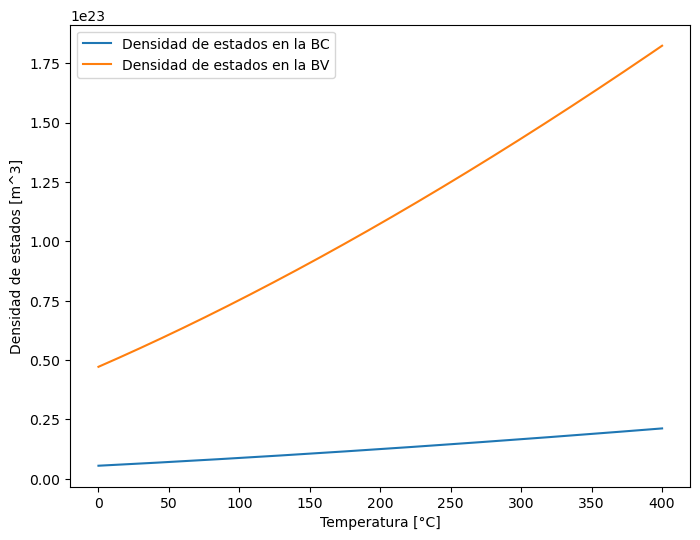

In [26]:
# Constantes
m0 = 9.11e-31           # Masa del electron en reposo [kg]
me = m0                 # Masa del electron en la BC, aprox m0 [kg]
mh = 4.20 * m0          # Masa del hueco en la BC [kg]
hbar = 1.05e-34         # Constante de Planck reducida [J s]
kB = 1.38e-23           # Constante de Boltzmann [J/K]
T = 300                 # Temperatura [K]

# Temperaturas
T_C = np.linspace(0, 400, 1000)
T_K = T_C + 273.15

# Densidad Efectiva de estados en BC y BV
Nc = 2 * (2 * np.pi * me * kB * T_K / hbar**2)**(3/2) / 1E6
Nv = 2 * (2 * np.pi * mh * kB * T_K / hbar**2)**(3/2) / 1E6

# Densidad a 300K
print('Densidad EFECTIVA de estados en la BC a 300K:', Nc[67])
print('Densidad EFECTIVA de estados en la BV a 300K:', Nv[67])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(T_C, Nc, label='Densidad de estados en la BC')
plt.plot(T_C, Nv, label='Densidad de estados en la BV')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Densidad de estados [m^3]')
plt.legend()
plt.show()


$g_c (E) = N_C \frac{2}{\sqrt{\pi}} \left( \frac{E-E_C}{k_B ~T} \right)^{1/2} ~~~$    y $~~~~~g_V (E) = N_V \frac{2}{\sqrt{\pi}} \left( \frac{E_V-E}{k_B ~T} \right)^{1/2} $

In [ ]:
# Whatever this is
#gC = Nc * 2/np.sqrt(np.pi) * ()

## 2. Semiconductor Puro

$$\mu \approx \frac{E_g}{2} + \frac{k_B ~T}{2} ~\left[ln\left( \frac{N_v}{N_c}\right) + ln\left( \frac{n}{n_i}\right) \right] $$
donde $$ n_i = N_c ~ e^{E_g / 2~ k_B ~ T} $$

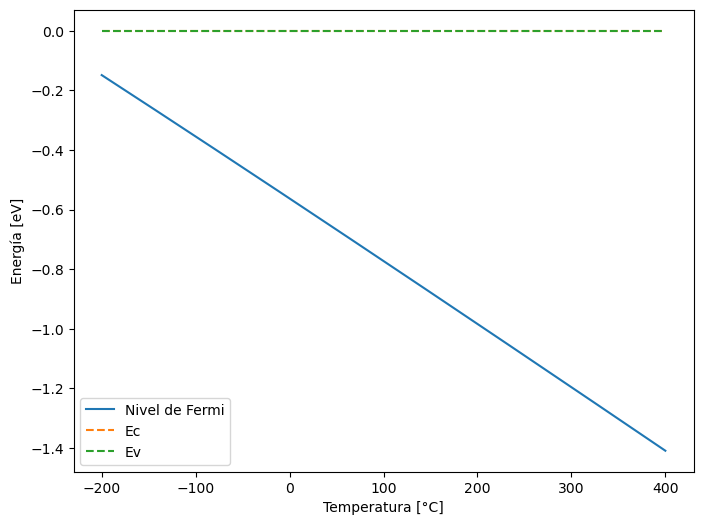

In [49]:

# Constantes
Ev = 0                 # Límite superior de la BV [eV]
Ec = 0                # Límite inferior de la BC [eV]
Eg = Ec - Ev           # Band gap [eV]
kB = 8.62e-5           # Constante de Boltzmann [eV/K]

T_C = np.linspace(-200, 400, 1000)
T_K = T_C + 273.15

n = 2 * np.ones(len(T_K))                                       # Concentración de electrones [m^-3]
ni = Nc * np.exp(-Eg/(2 * kB * T_K))      # Portadores intrínsecos a 300K



# Potencial químico, 
############ no tendría que estar en 0???????
mu_c = Eg/2 + kB * T_K / 2 * (np.log(Nv/Nc) + np.log(n/ni))


# Plot
plt.figure(figsize=(8, 6))
plt.plot(T_C, mu_c, label='Nivel de Fermi')
plt.plot(T_C, Ec * np.ones_like(T_C), '--', label='Ec')
plt.plot(T_C, Ev * np.ones_like(T_C), '--', label='Ev')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Energía [eV]')
plt.legend()
plt.show()

Aproximación de baja densidad para una energía $ɛ_r$:
$$ ln(Z^{e^-}) ≈ N_c ~ e^{-β (ɛ_c - μ)} * V $$
$$ ln(Z^{h^+}) ≈ N_v ~ e^{+β (ɛ_v - μ)} * V $$

Función FD para electrones a 300K: 329368296610.2497
Función FD para huecos a 300K: 1.0377947142423488e+33


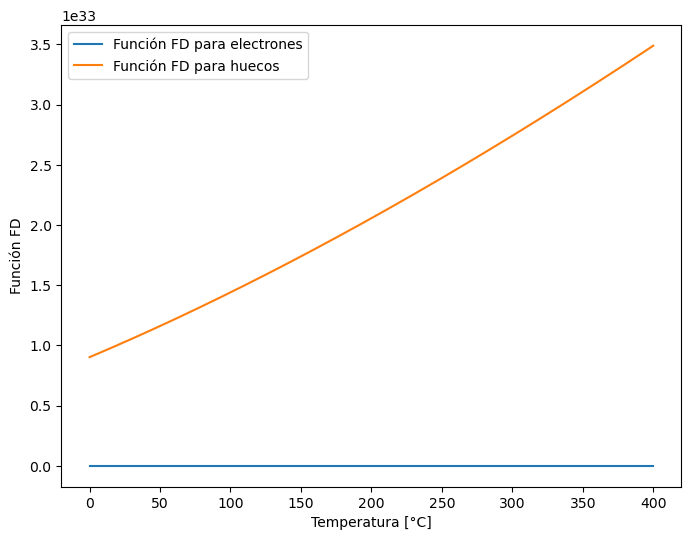

In [29]:
# Función de Fermi-Dirac para bajas densidades en la frontera
lnZ_e_Ec = Nc * np.exp(-(Ec - mu_c)/(kB * T_K))
lnZ_h_Ev = Nv * np.exp(-(mu_c - Ev)/(kB * T_K))

# Función de Fermi-Dirac para altas densidades a 300K
print('Función FD para electrones a 300K:', lnZ_e_Ec[67])
print('Función FD para huecos a 300K:', lnZ_h_Ev[67])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(T_C, lnZ_e_Ec, label='Función FD para electrones')
plt.plot(T_C, lnZ_h_Ev, label='Función FD para huecos')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Función FD')
plt.legend()
plt.show()


Aproximación de alta densidad para una energía $ɛ_r$

$$ Z^{e^-} ≈ exp\left(\frac{4}{15} ~N_C~ \left( \frac{μ-E_c}{k_B ~T} \right)^{5/2} ~ V \right)$$
$$ Z^{h^+} ≈ exp\left( \frac{4}{15} ~N_V~ \left( \frac{E_V-μ}{k_B ~T} \right)^{5/2} ~ V \right)$$

In [30]:
'''
V = 1    # Volumen [cm^3]

# Función de Fermi-Dirac para bajas densidades en la frontera
Z_e = np.exp(4/15 * Nc * (-(mu_c - Ec)/(kB * T_K))**(5/2) * V)
Z_h = np.exp(4/15 * Nv * (-(Ev - mu_c)/(kB * T_K))**(5/2) * V)

# Función de Fermi-Dirac para altas densidades a 300K
print('Función FD para electrones a 300K:', Z_e[67])
print('Función FD para huecos a 300K:', Z_h[67])
'''

"\nV = 1    # Volumen [cm^3]\n\n# Función de Fermi-Dirac para bajas densidades en la frontera\nZ_e = np.exp(4/15 * Nc * (-(mu_c - Ec)/(kB * T_K))**(5/2) * V)\nZ_h = np.exp(4/15 * Nv * (-(Ev - mu_c)/(kB * T_K))**(5/2) * V)\n\n# Función de Fermi-Dirac para altas densidades a 300K\nprint('Función FD para electrones a 300K:', Z_e[67])\nprint('Función FD para huecos a 300K:', Z_h[67])\n"

# 3. Trampas

$$ ln(Z^{e^-}) = \sum_r N_t ~ ln\left(1 + N_t * e^{-β ~ (ɛ_r - μ)}\right)$$

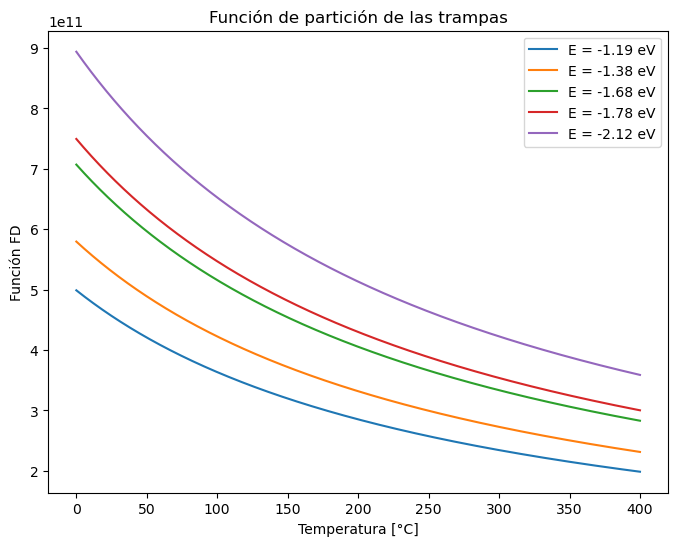

In [31]:

# Constantes
Nt = 1E10              # Densidad de partículas [cm^-3]
gt = 2                 # Degeneración
kB = 8.62e-5           # Constante de Boltzmann [eV/K]

# Energías accesibles y temperatura
#E = [-10, -5, 0, 13.8, 14, 16, 20]     # Energías discretas [eV]
ETc = [1.19, 1.38, 1.68, 1.78, 2.12]
ETv = np.ones(len(ETc))* Eg - ETc

T = np.linspace(0, 400, 1000)           # Temperaturas [°C]
T_K = T + 273.15                        # Temperaturas [K]

# Función de Fermi-Dirac en función de T
lnZ_t = np.empty((len(T_K), 0))
for i in range(len(ETv)):
    new_col = Nt * np.log(1 + Nt * np.exp(-(ETv[i] - mu_c)/(kB * T_K)))
    new_col = new_col.reshape(-1, 1)
    lnZ_t = np.hstack((lnZ_t, new_col))

# Plot
plt.figure(figsize=(8, 6))
for i in range(len(ETv)):
    plt.plot(T, lnZ_t[:,i], label='E = ' + str(round(ETv[i], 2)) + ' eV')
plt.legend()
plt.title('Función de partición de las trampas')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Función FD')
plt.show()


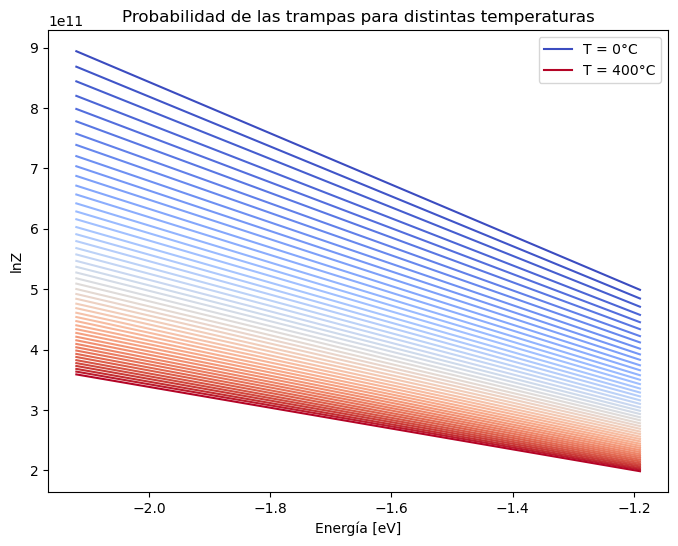

In [32]:
# Temperaturas a graficar
num_plots = 50
temp_indices = np.linspace(0, len(T) - 1, num_plots, dtype=int)
temp_values = [T[i] for i in temp_indices]

# Temperaturas de referencia para la leyenda
ref_temps = [0, 50, 100, 200, 400]
ref_indices = [np.argmin(np.abs(T - t)) for t in ref_temps]

# Colormap para asignar colores a las curvas
cmap = plt.colormaps.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=0, vmax=400)  # Normalize temperature range

# Plot
plt.figure(figsize=(8, 6))
for i, idx in enumerate(temp_indices):
    color = cmap(norm(temp_values[i]))  # Assign color based on temperature
    label = f'T = {int(temp_values[i])}°C' if idx in ref_indices else None  # Label only for reference temps
    plt.plot(ETv, lnZ_t[idx, :], color=color, label=label)
plt.legend()
plt.xlabel('Energía [eV]')
plt.ylabel('lnZ')
plt.title('Probabilidad de las trampas para distintas temperaturas')
plt.show()

Energía media para un valor de E
$$
\overline{E} = - \left( \frac{\partial ln(Z)}{\partial β} \right) = N_t^2 \frac{(E_t - μ) ~e^{- \frac{(E_t - μ)}{k_B ~T}} }{1 + N_t ~ e^{- \frac{(E_t - μ)}{k_B ~T}}}
$$

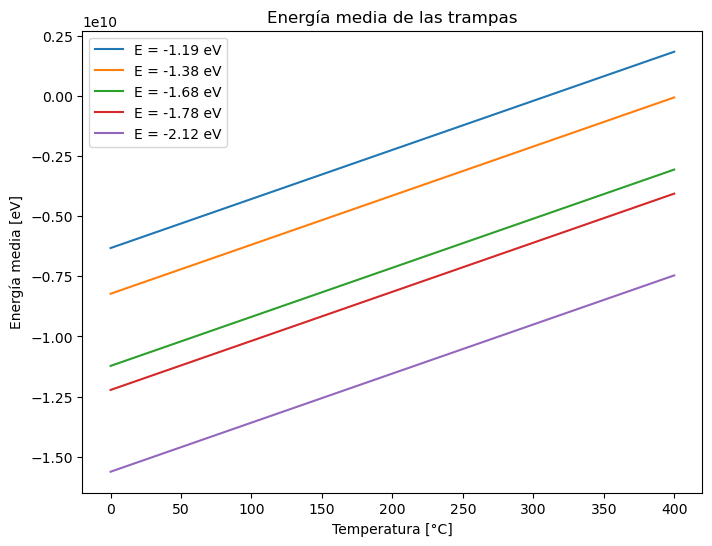

In [33]:
# Energía media con las energías de las trampas
avgE_t = np.empty((len(T_K), 0))
for i in range(len(ETv)):
    new_col = Nt**2 * (ETv[i] - mu_c) * np.exp(-(ETv[i] - mu_c)/(kB * T_K)) / (1 + Nt * np.exp(-(ETv[i] - mu_c)/(kB * T_K)))
    new_col = new_col.reshape(-1, 1)
    avgE_t = np.hstack((avgE_t, new_col))

# Plot
plt.figure(figsize=(8, 6))
for i in range(len(ETv)):
    plt.plot(T, avgE_t[:,i], label='E = ' + str(round(ETv[i], 2)) + ' eV')
plt.legend()
plt.title('Energía media de las trampas')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Energía media [eV]')
plt.show()


Entropía !!! Finally
$$
S = k_B\left(ln(Q)~+~ \frac{1}{k_BT} \overline{E} ~-~\frac{1}{k_BT} N\mu \right)
$$

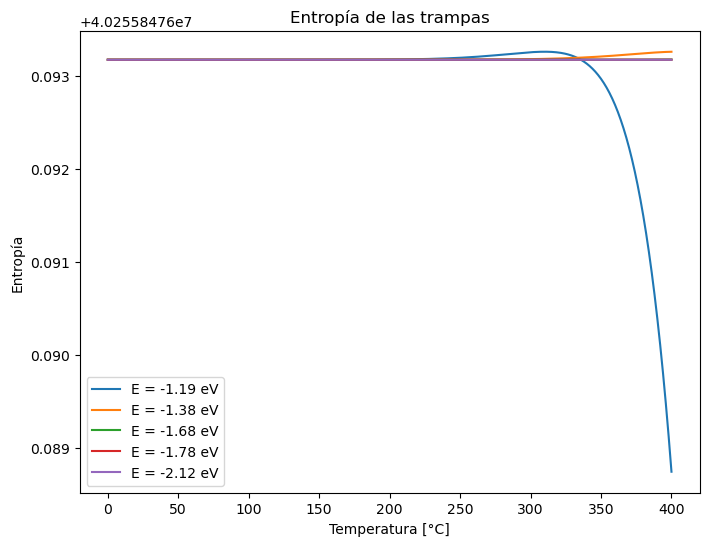

In [34]:

# Entropía de las trampas
S_t = np.empty((len(T_K), 0))
for i in range(len(ETv)):
    new_col = kB * (lnZ_t[:,i] + 1/(kB * T_K) * avgE_t[:,i] - 1/(kB * T_K) * Nt * mu_c)
    new_col = new_col.reshape(-1, 1)
    S_t = np.hstack((S_t, new_col))

# Plot
plt.figure(figsize=(8, 6))
for i in range(len(ETv)):
    plt.plot(T, S_t[:,i], label='E = ' + str(round(ETv[i], 2)) + ' eV')
plt.legend()
plt.title('Entropía de las trampas')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Entropía')
plt.show()

# 4. Bandas de energía

Voy a repetir el código para la banda de valencia y conducción. Puedo usar del desarrollo anterior:
- Densidad efectiva de estados (```Nv = NV```, y ```Nc = NC```)
- Nivel de fermi (```mu_c = mu```)

Empiezo por la Función de Partición FD

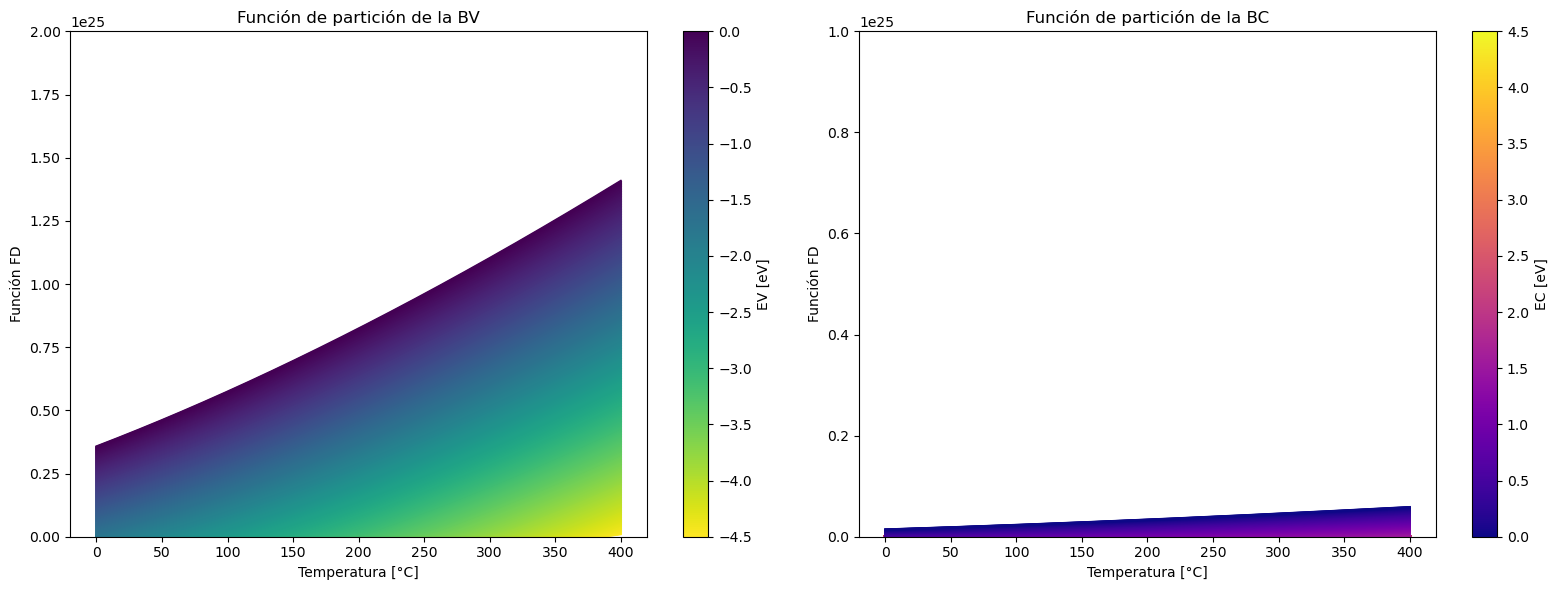

In [35]:
# Energías de la banda de Conducción y de Valencia
step = 4.5                            # Anchura de las bandas [eV]
npoint = 500                         # Número de puntos
EC = np.linspace(Eg, Eg + step, npoint)
EV = np.linspace(-step, 0, npoint)
EC= EC[::-1]                        # Flip para el plot

# Función de Fermi-Dirac en función de T para BV y BC
lnZ_EC = np.empty((len(T_K), 0))
for i in range(len(EC)):
    new_col = Nc * np.log(1 + Nc * np.exp(-(EC[i] - mu_c)/(kB * T_K)))
    new_col = new_col.reshape(-1, 1)
    lnZ_EC = np.hstack((lnZ_EC, new_col))

lnZ_EV = np.empty((len(T_K), 0))
for i in range(len(EV)):
    new_col = Nv * np.log(1 + Nv * np.exp(-(mu_c - EV[i])/(kB * T_K)))
    new_col = new_col.reshape(-1, 1)
    lnZ_EV = np.hstack((lnZ_EV, new_col))
    
# Plot BV y BC con gradiente continuo
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Para la banda de Valencia (EV)
cmap_EV = plt.get_cmap('viridis_r')             
norm_EV = plt.Normalize(vmin=min(EV), vmax=max(EV))  # Normaliza EV
sm_EV = plt.cm.ScalarMappable(cmap=cmap_EV, norm=norm_EV)
sm_EV.set_array([])

for energy, col in zip(EV, range(len(EV))):
    axes[0].plot(T_C, lnZ_EV[:, col].flatten(), color=cmap_EV(norm_EV(energy)))
axes[0].set_title('Función de partición de la BV')
axes[0].set_xlabel('Temperatura [°C]')
axes[0].set_ylabel('Función FD')
axes[0].set_ylim(0, 2E25)
cbar_EV = fig.colorbar(sm_EV, ax=axes[0])
cbar_EV.set_label('EV [eV]')

# Para la banda de Conducción (EC)
cmap_EC = plt.get_cmap('plasma')               
norm_EC = plt.Normalize(vmin=min(EC), vmax=max(EC))
sm_EC = plt.cm.ScalarMappable(cmap=cmap_EC, norm=norm_EC)
sm_EC.set_array([])

for energy, col in zip(EC, range(len(EC))):
    axes[1].plot(T_C, lnZ_EC[:, col], color=cmap_EC(norm_EC(energy)))
axes[1].set_title('Función de partición de la BC')
axes[1].set_xlabel('Temperatura [°C]')
axes[1].set_ylabel('Función FD')
axes[1].set_ylim(0, 1E25)
cbar_EC = fig.colorbar(sm_EC, ax=axes[1])
cbar_EC.set_label('EC [eV]')

plt.tight_layout()
plt.show()


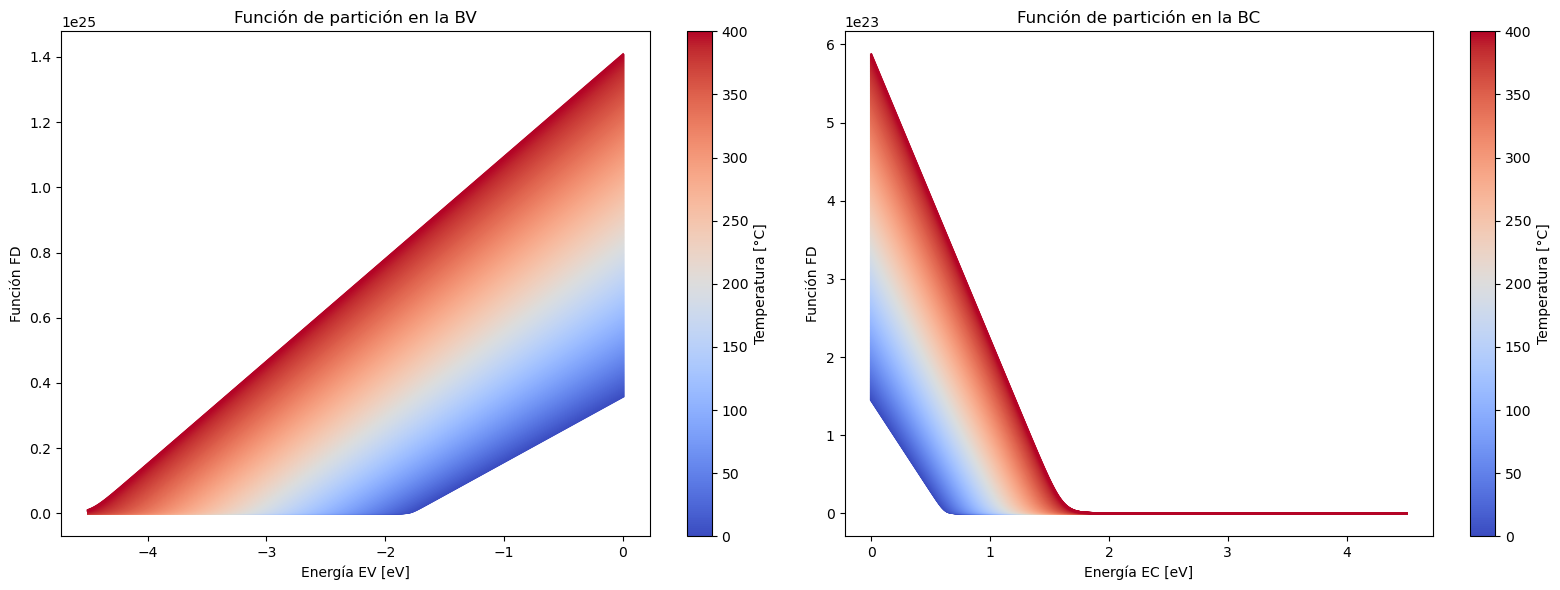

In [36]:
T = T_C
# Plot BV y BC con gradiente continuo en temperatura
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Normalización para el gradiente de temperatura
cmap_T = plt.get_cmap('coolwarm')  # Puedes elegir otro colormap
norm_T = plt.Normalize(vmin=min(T), vmax=max(T))
sm_T = plt.cm.ScalarMappable(cmap=cmap_T, norm=norm_T)
sm_T.set_array([])

# Para la banda de Valencia (EV)
for i, temp in enumerate(T):
    axes[0].plot(EV, lnZ_EV[i, :], color=cmap_T(norm_T(temp)))

axes[0].set_title('Función de partición en la BV')
axes[0].set_xlabel('Energía EV [eV]')
axes[0].set_ylabel('Función FD')
cbar_EV = fig.colorbar(sm_T, ax=axes[0])
cbar_EV.set_label('Temperatura [°C]')

# Para la banda de Conducción (EC)
for i, temp in enumerate(T):
    axes[1].plot(EC, lnZ_EC[i, :], color=cmap_T(norm_T(temp)))

axes[1].set_title('Función de partición en la BC')
axes[1].set_xlabel('Energía EC [eV]')
axes[1].set_ylabel('Función FD')
cbar_EC = fig.colorbar(sm_T, ax=axes[1])
cbar_EC.set_label('Temperatura [°C]')

plt.tight_layout()
plt.show()


Energía media

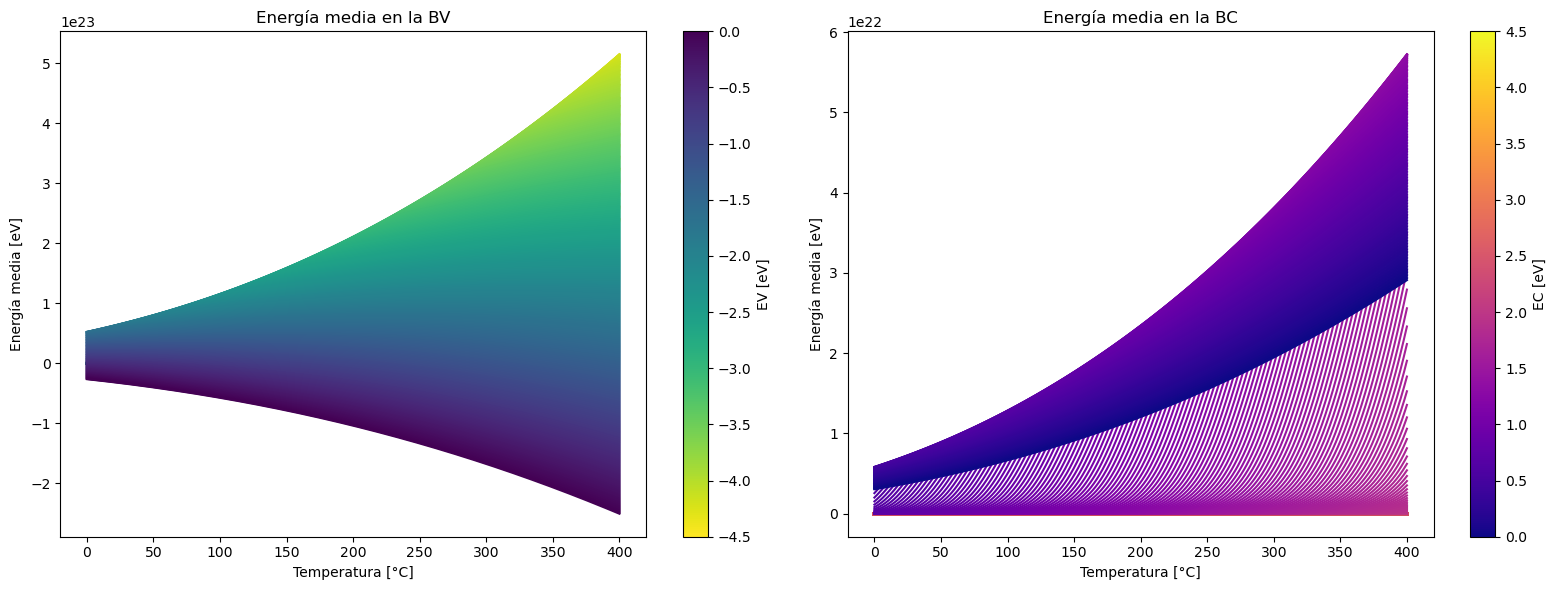

In [37]:
# Energía media para la BV y BC
avgE_EV = np.empty((len(T_K), 0))
for i in range(len(EV)):
    new_col = Nv**2 * (mu_c - EV[i]) * np.exp(-(mu_c - EV[i])/(kB * T_K)) / (1 + Nv * np.exp(-(mu_c - EV[i])/(kB * T_K)))
    new_col = new_col.reshape(-1, 1)
    avgE_EV = np.hstack((avgE_EV, new_col))

avgE_EC = np.empty((len(T_K), 0))
for i in range(len(EC)):
    new_col = Nc**2 * (EC[i] - mu_c) * np.exp(-(EC[i] - mu_c)/(kB * T_K)) / (1 + Nc * np.exp(-(EC[i] - mu_c)/(kB * T_K)))
    new_col = new_col.reshape(-1, 1)
    avgE_EC = np.hstack((avgE_EC, new_col))

# Plot BV y BC con gradiente continuo en temperatura
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Para la banda de Valencia (EV)
# (la configuración del mapa de colores está dos celdas arriba)
for energy, col in zip(EV, range(len(EV))):
    axes[0].plot(T, avgE_EV[:, col], color=cmap_EV(norm_EV(energy)))
axes[0].set_title('Energía media en la BV')
axes[0].set_xlabel('Temperatura [°C]')
axes[0].set_ylabel('Energía media [eV]')
cbar_EV = fig.colorbar(sm_EV, ax=axes[0])
cbar_EV.set_label('EV [eV]')

# Para la banda de Conducción (EC)
# (la configuración del mapa de colores está dos celdas arriba)
for energy, col in zip(EC, range(len(EC))):
    axes[1].plot(T, avgE_EC[:, col], color=cmap_EC(norm_EC(energy)))
axes[1].set_title('Energía media en la BC')
axes[1].set_xlabel('Temperatura [°C]')
axes[1].set_ylabel('Energía media [eV]')
cbar_EC = fig.colorbar(sm_EC, ax=axes[1])
cbar_EC.set_label('EC [eV]')
plt.tight_layout()
plt.show()

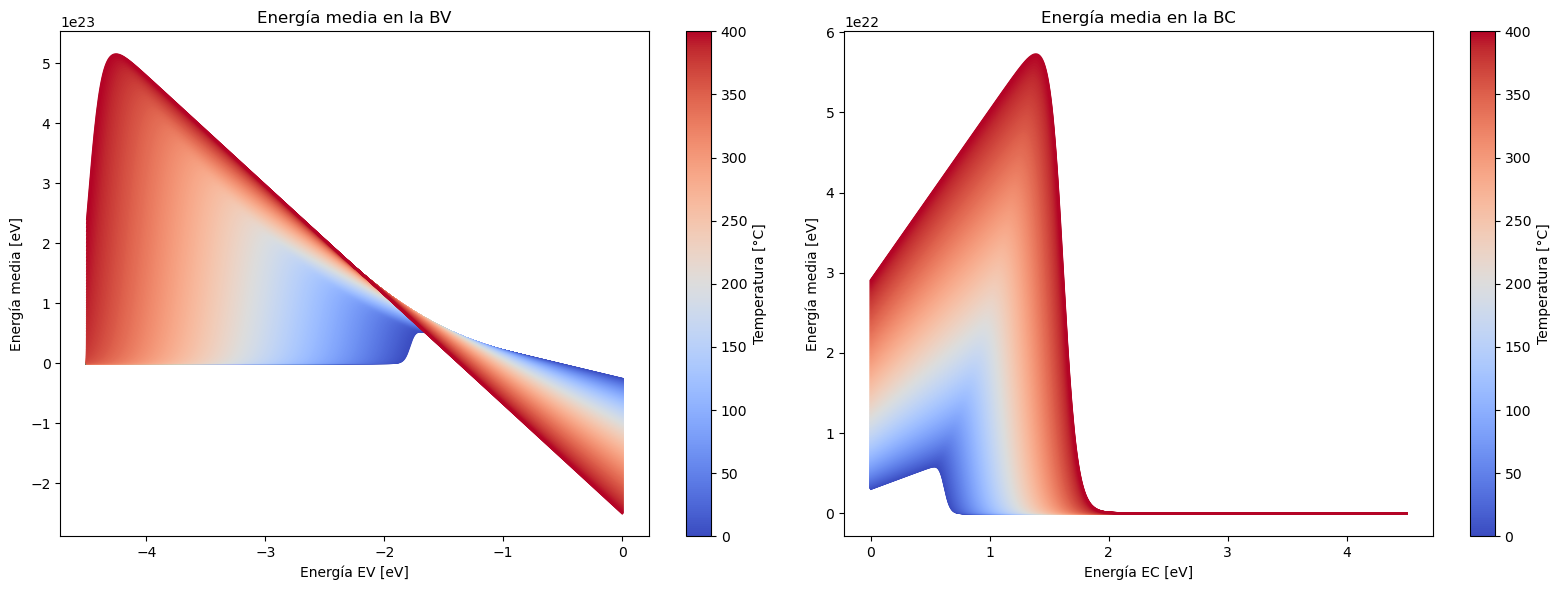

In [38]:
# Energía media para BV y BC a unas temperaturas (ver trampas)
# (la configuración del mapa de colores está dos celdas arriba)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Para la banda de Valencia (EV)
for i, temp in enumerate(T):
    axes[0].plot(EV, avgE_EV[i, :], color=cmap_T(norm_T(temp)))
axes[0].set_title('Energía media en la BV')
axes[0].set_xlabel('Energía EV [eV]')
axes[0].set_ylabel('Energía media [eV]')
cbar_EV = fig.colorbar(sm_T, ax=axes[0])
cbar_EV.set_label('Temperatura [°C]')

# Para la banda de Conducción (EC)
for i, temp in enumerate(T):
    axes[1].plot(EC, avgE_EC[i, :], color=cmap_T(norm_T(temp)))
axes[1].set_title('Energía media en la BC')
axes[1].set_xlabel('Energía EC [eV]')
axes[1].set_ylabel('Energía media [eV]')
cbar_EC = fig.colorbar(sm_T, ax=axes[1])
cbar_EC.set_label('Temperatura [°C]')
plt.tight_layout()
plt.show()


Entropía !!

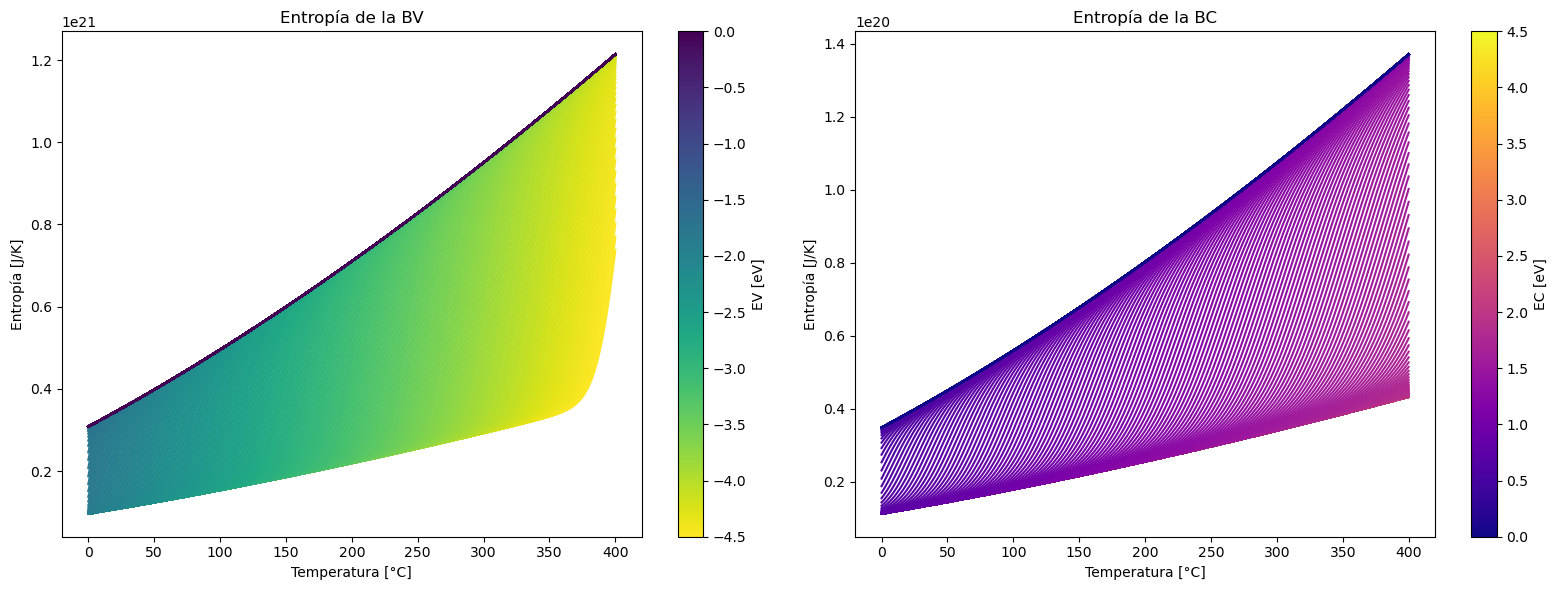

In [39]:
# Entropía de las BV y BC
S_EV = np.empty((len(T_K), 0))
for i in range(len(EV)):
    new_col = kB * (lnZ_EV[:,i] + 1/(kB * T_K) * avgE_EV[:,i] - 1/(kB * T_K) * Nv * mu_c)
    new_col = new_col.reshape(-1, 1)
    S_EV = np.hstack((S_EV, new_col))

S_EC = np.empty((len(T_K), 0))
for i in range(len(EC)):
    new_col = kB * (lnZ_EC[:,i] + 1/(kB * T_K) * avgE_EC[:,i] - 1/(kB * T_K) * Nc * mu_c)
    new_col = new_col.reshape(-1, 1)
    S_EC = np.hstack((S_EC, new_col))

# Plot BV y BC vs Temperatura
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Para la banda de Valencia (EV)
# (la configuración del mapa de colores está cuatro celdas arriba)
for energy, col in zip(EV, range(len(EV))):
    axes[0].plot(T, S_EV[:, col], color=cmap_EV(norm_EV(energy)))
axes[0].set_title('Entropía de la BV')
axes[0].set_xlabel('Temperatura [°C]')
axes[0].set_ylabel('Entropía [J/K]')
cbar_EV = fig.colorbar(sm_EV, ax=axes[0])
cbar_EV.set_label('EV [eV]')
#axes[0].set_ylim(-0.4, 9)

# Para la banda de Conducción (EC)
# (la configuración del mapa de colores está cuatro celdas arriba)
for energy, col in zip(EC, range(len(EC))):
    axes[1].plot(T, S_EC[:, col], color=cmap_EC(norm_EC(energy)))
axes[1].set_title('Entropía de la BC')
axes[1].set_xlabel('Temperatura [°C]')
axes[1].set_ylabel('Entropía [J/K]')
cbar_EC = fig.colorbar(sm_EC, ax=axes[1])
cbar_EC.set_label('EC [eV]')
plt.tight_layout()
plt.show()


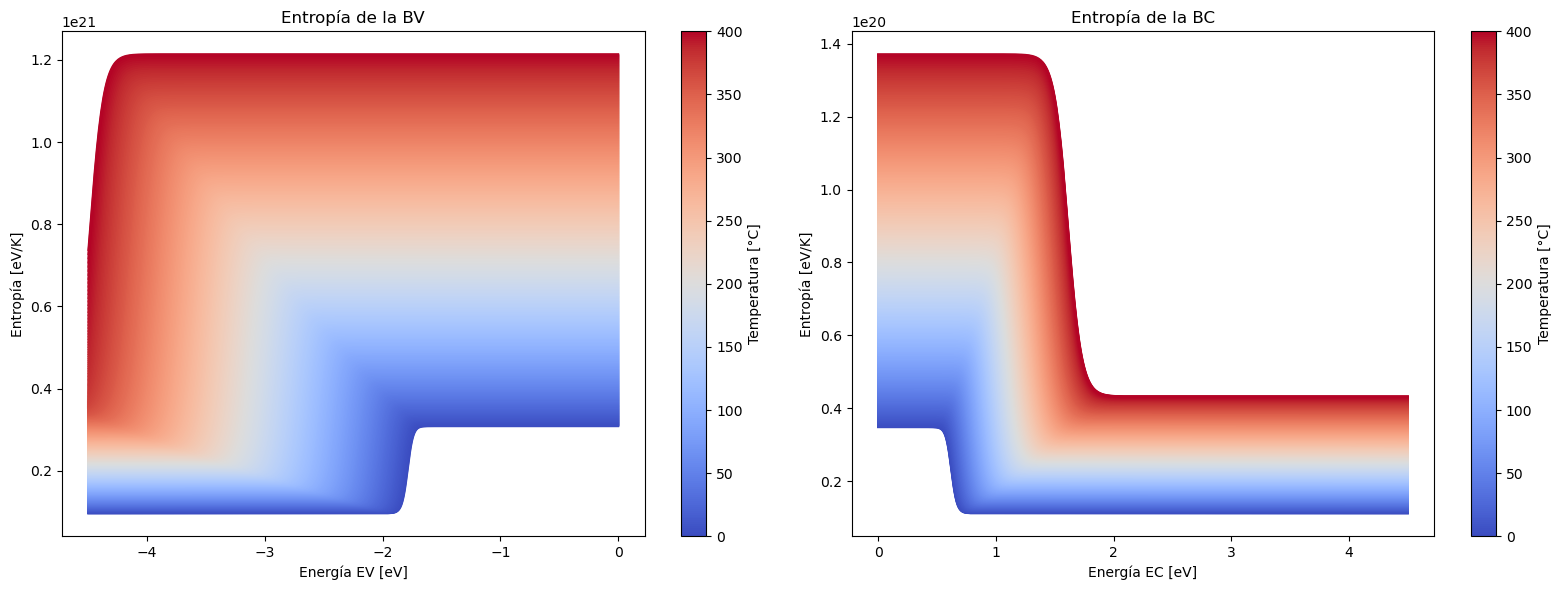

In [40]:
# Entropía para BV y BC a unas temperaturas (ver trampas)
# (la configuración del mapa de colores está cuatro celdas arriba)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Para la banda de Valencia (EV)
for i, temp in enumerate(T):
    axes[0].plot(EV, S_EV[i, :], color=cmap_T(norm_T(temp)))
axes[0].set_title('Entropía de la BV')
axes[0].set_xlabel('Energía EV [eV]')
axes[0].set_ylabel('Entropía [eV/K]')
cbar_EV = fig.colorbar(sm_T, ax=axes[0])
cbar_EV.set_label('Temperatura [°C]')

# Para la banda de Conducción (EC)
for i, temp in enumerate(T):
    axes[1].plot(EC, S_EC[i, :], color=cmap_T(norm_T(temp)))
axes[1].set_title('Entropía de la BC')
axes[1].set_xlabel('Energía EC [eV]')
axes[1].set_ylabel('Entropía [eV/K]')
cbar_EC = fig.colorbar(sm_T, ax=axes[1])
cbar_EC.set_label('Temperatura [°C]')
plt.tight_layout()
plt.show()